In [ ]:
from datasets import load_dataset

ds = load_dataset("papluca/language-identification")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train.csv:   0%|          | 0.00/12.0M [00:00<?, ?B/s]

valid.csv: 0.00B [00:00, ?B/s]

test.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/70000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

# Task
Create a language detection model using the "papluca/language-identification" dataset, then preprocess the text data, split it into training and testing sets, train a language detection model, evaluate its performance, and finally demonstrate its functionality on new text examples.

## Load and Inspect Data

### Subtask:
Load the dataset and inspect its structure, features, and a few examples to confirm understanding of the data for language detection.


**Reasoning**:
The first instruction is to display the entire dataset structure by calling `ds`. Printing `ds` will show the overall structure of the loaded dataset.



In [11]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['labels', 'text', 'preprocessed_text'],
        num_rows: 70000
    })
    validation: Dataset({
        features: ['labels', 'text', 'preprocessed_text'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['labels', 'text', 'preprocessed_text'],
        num_rows: 10000
    })
})


**Reasoning**:
The previous cell failed because the `ds` object was not defined. This was due to the dataset loading cell not being executed. To fix this, I need to ensure the `ds` object is initialized by including the `load_dataset` call in the current code block, and then proceed with displaying its structure, features, and examples as per the instructions.



In [12]:
from datasets import load_dataset

ds = load_dataset("papluca/language-identification")

# 1. Display the entire dataset structure
print(ds)

# 2. Access the 'train' split of the dataset and print its features
print(ds['train'].features)

# 3. Display the first few examples from the 'train' split
print(ds['train'][:5])

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 70000
    })
    validation: Dataset({
        features: ['labels', 'text'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 10000
    })
})
{'labels': Value('string'), 'text': Value('string')}
{'labels': ['pt', 'bg', 'zh', 'th', 'ru'], 'text': ['os chefes de defesa da estónia, letónia, lituânia, alemanha, itália, espanha e eslováquia assinarão o acordo para fornecer pessoal e financiamento para o centro.', 'размерът на хоризонталната мрежа може да бъде по реда на няколко километра ( km ) за на симулация до около 100 km за на симулация .', '很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把这段话复制走了，既能赚积分，还省事，走到哪复制到哪，最重要的是，不用认真的评论了，不用想还差多少字，直接发出就可以了，推荐给大家！！', 'สำหรับ ของเก่า ที่ จริงจัง ลอง   honeychurch   ของเก่า ที่ ไม่   29   สำหรับ เฟอร์นิเจอร์ และ เงิน ไท ร้อง บริษัท ที่   122   สำหรับ ลาย คราม', 'Он увеличил давление .']}


**Reasoning**:
The next step is to visualize the distribution of languages in the dataset, as per the 'Visualize Data' subtask. I will start by counting the occurrences of each language label in the 'train' split and then create a bar chart to display this distribution.



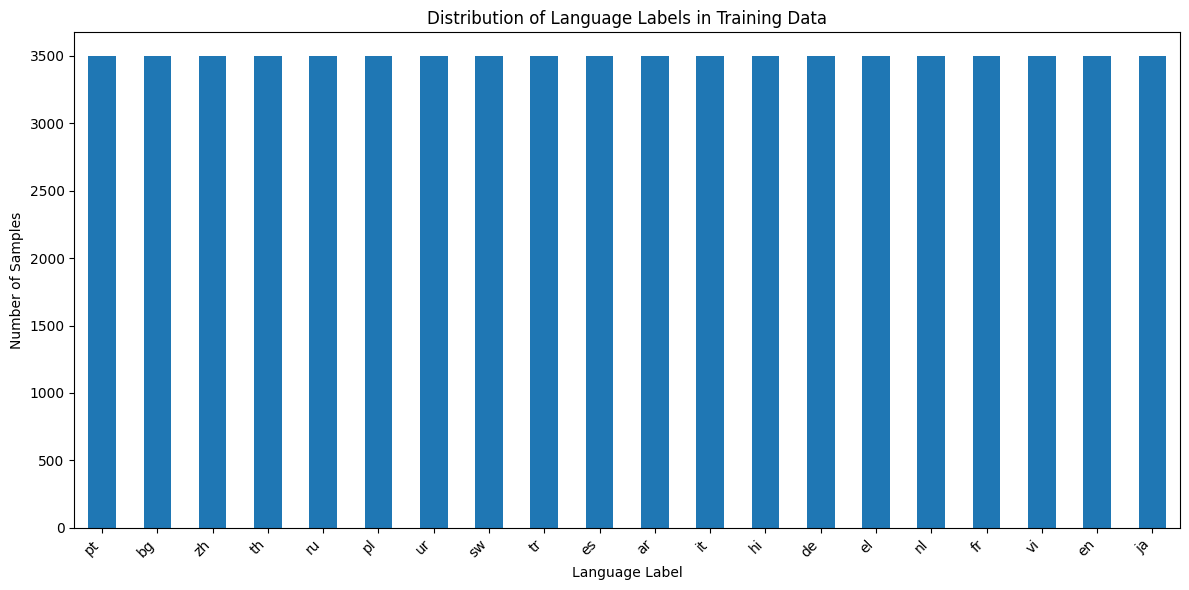

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'labels' column from the 'train' split to a pandas Series
labels_series = pd.Series(ds['train']['labels'])

# Count the occurrences of each unique label
label_counts = labels_series.value_counts()

# Create a bar chart to visualize the distribution of language labels
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Language Labels in Training Data')
plt.xlabel('Language Label')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Preprocess Text Data

### Subtask:
Clean and preprocess the text data, which may include lowercasing, removing punctuation, and tokenization, to prepare it for model training.


**Reasoning**:
To begin preprocessing the text data, I need to import the necessary libraries, `string` and `nltk`, and ensure the `punkt` tokenizer data is available. Then, I will define a function that converts text to lowercase, removes punctuation, and tokenizes the text, preparing it for subsequent model training.



In [13]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')

def preprocess_text(examples):
    processed_texts = []
    for text in examples['text']:
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenize
        tokens = nltk.word_tokenize(text)
        processed_texts.append(' '.join(tokens)) # Join tokens back to a string for now
    return {'preprocessed_text': processed_texts}

# Apply preprocessing to all splits
ds = ds.map(preprocess_text, batched=True)

# Inspect the first few examples of the preprocessed data
print(ds['train']['text'][:5])
print(ds['train']['preprocessed_text'][:5])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Map:   0%|          | 0/70000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

['os chefes de defesa da estónia, letónia, lituânia, alemanha, itália, espanha e eslováquia assinarão o acordo para fornecer pessoal e financiamento para o centro.', 'размерът на хоризонталната мрежа може да бъде по реда на няколко километра ( km ) за на симулация до около 100 km за на симулация .', '很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把这段话复制走了，既能赚积分，还省事，走到哪复制到哪，最重要的是，不用认真的评论了，不用想还差多少字，直接发出就可以了，推荐给大家！！', 'สำหรับ ของเก่า ที่ จริงจัง ลอง   honeychurch   ของเก่า ที่ ไม่   29   สำหรับ เฟอร์นิเจอร์ และ เงิน ไท ร้อง บริษัท ที่   122   สำหรับ ลาย คราม', 'Он увеличил давление .']
['os chefes de defesa da estónia letónia lituânia alemanha itália espanha e eslováquia assinarão o acordo para fornecer pessoal e financiamento para o centro', 'размерът на хоризонталната мрежа може да бъде по реда на няколко километра km за на симулация до около 100 km за на симулация', '很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把这段话复制走了，既能赚积分，还省事，走到哪复制到哪，最重要的是，不用认真的评论了，不用想还差多少字，直接发出就可以了，推荐给大家！！', 'สำหรับ

**Reasoning**:
The previous cell failed with a `LookupError` because the `punkt_tab` NLTK resource was not found. To fix this, I need to explicitly download `punkt_tab` in addition to `punkt` to ensure all necessary tokenizer data is available.



In [5]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('punkt_tab') # Download punkt_tab as suggested by the error

def preprocess_text(examples):
    processed_texts = []
    for text in examples['text']:
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenize
        tokens = nltk.word_tokenize(text)
        processed_texts.append(' '.join(tokens)) # Join tokens back to a string for now
    return {'preprocessed_text': processed_texts}

# Apply preprocessing to all splits
ds = ds.map(preprocess_text, batched=True)

# Inspect the first few examples of the preprocessed data
print(ds['train']['text'][:5])
print(ds['train']['preprocessed_text'][:5])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Map:   0%|          | 0/70000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

['os chefes de defesa da estónia, letónia, lituânia, alemanha, itália, espanha e eslováquia assinarão o acordo para fornecer pessoal e financiamento para o centro.', 'размерът на хоризонталната мрежа може да бъде по реда на няколко километра ( km ) за на симулация до около 100 km за на симулация .', '很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把这段话复制走了，既能赚积分，还省事，走到哪复制到哪，最重要的是，不用认真的评论了，不用想还差多少字，直接发出就可以了，推荐给大家！！', 'สำหรับ ของเก่า ที่ จริงจัง ลอง   honeychurch   ของเก่า ที่ ไม่   29   สำหรับ เฟอร์นิเจอร์ และ เงิน ไท ร้อง บริษัท ที่   122   สำหรับ ลาย คราม', 'Он увеличил давление .']
['os chefes de defesa da estónia letónia lituânia alemanha itália espanha e eslováquia assinarão o acordo para fornecer pessoal e financiamento para o centro', 'размерът на хоризонталната мрежа може да бъде по реда на няколко километра km за на симулация до около 100 km за на симулация', '很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把这段话复制走了，既能赚积分，还省事，走到哪复制到哪，最重要的是，不用认真的评论了，不用想还差多少字，直接发出就可以了，推荐给大家！！', 'สำหรับ

**Reasoning**:
The previous code block successfully preprocessed the text data by converting to lowercase, removing punctuation, and tokenizing. To prepare the dataset for model training, the string labels ('pt', 'bg', etc.) must be converted into numerical IDs. I will create a mapping from label names to integers and apply it to the 'labels' column of all dataset splits.



In [6]:
unique_labels = ds['train'].unique('labels')
label_to_id = {label: i for i, label in enumerate(unique_labels)}
id_to_label = {i: label for i, label in enumerate(unique_labels)}

def encode_labels(examples):
    return {'labels': [label_to_id[label] for label in examples['labels']]}

ds = ds.map(encode_labels, batched=True)

# Inspect the updated dataset with numerical labels
print(ds['train']['labels'][:5])
print(f"Label to ID mapping: {label_to_id}")

Map:   0%|          | 0/70000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

[0, 1, 2, 3, 4]
Label to ID mapping: {'pt': 0, 'bg': 1, 'zh': 2, 'th': 3, 'ru': 4, 'pl': 5, 'ur': 6, 'sw': 7, 'tr': 8, 'es': 9, 'ar': 10, 'it': 11, 'hi': 12, 'de': 13, 'el': 14, 'nl': 15, 'fr': 16, 'vi': 17, 'en': 18, 'ja': 19}


## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed dataset into training and testing sets to properly evaluate the model's performance on unseen data.


**Reasoning**:
To divide the preprocessed dataset, I will extract the 'preprocessed_text' and 'labels' columns from the 'train' and 'test' splits of the `ds` dataset and assign them to `X_train`, `y_train`, `X_test`, and `y_test` respectively.



In [7]:
X_train = ds['train']['preprocessed_text']
y_train = ds['train']['labels']
X_test = ds['test']['preprocessed_text']
y_test = ds['test']['labels']

print(f"X_train samples: {len(X_train)}")
print(f"y_train samples: {len(y_train)}")
print(f"X_test samples: {len(X_test)}")
print(f"y_test samples: {len(y_test)}")


X_train samples: 70000
y_train samples: 70000
X_test samples: 10000
y_test samples: 10000


## Train Language Detection Model

### Subtask:
Train a machine learning model suitable for text classification, such as a classifier based on TF-IDF features or a simple neural network, using the training data.


**Reasoning**:
To prepare the text data for machine learning and train the classification model, I will import `TfidfVectorizer` and `LogisticRegression`, vectorize the training and testing text data using TF-IDF, and then train a logistic regression model on the vectorized training data.



In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# 3. Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# 4. Fit the TfidfVectorizer on X_train and then transform both X_train and X_test
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)

print("Shape of X_train_vectorized:", X_train_vectorized.shape)
print("Shape of X_test_vectorized:", X_test_vectorized.shape)

# 5. Instantiate LogisticRegression with a max_iter parameter
model = LogisticRegression(max_iter=1000)

# 6. Train the LogisticRegression model
model.fit(X_train_vectorized, y_train)

print("Logistic Regression model trained successfully.")

Shape of X_train_vectorized: (70000, 188026)
Shape of X_test_vectorized: (10000, 188026)
Logistic Regression model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the test set using appropriate metrics like accuracy, precision, recall, and F1-score for language detection.


**Reasoning**:
To evaluate the trained model, I will import the necessary metrics, make predictions on the vectorized test data, and then print the accuracy and a detailed classification report.



In [9]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=[id_to_label[i] for i in sorted(id_to_label.keys())])
print("Classification Report:\n", report)

Accuracy: 0.9113
Classification Report:
               precision    recall  f1-score   support

          pt       0.98      0.95      0.97       500
          bg       0.98      0.97      0.98       500
          zh       0.39      1.00      0.56       500
          th       1.00      0.65      0.79       500
          ru       0.99      0.92      0.96       500
          pl       0.97      0.93      0.95       500
          ur       1.00      0.95      0.98       500
          sw       0.99      0.95      0.97       500
          tr       0.98      0.91      0.94       500
          es       0.99      0.99      0.99       500
          ar       1.00      0.91      0.95       500
          it       0.99      0.96      0.98       500
          hi       1.00      0.95      0.97       500
          de       1.00      0.98      0.99       500
          el       1.00      0.98      0.99       500
          nl       0.99      0.97      0.98       500
          fr       1.00      0.99      0

## Demonstrate Language Detection

### Subtask:
Use the trained model to predict the language of a few new text examples to demonstrate its functionality.


**Reasoning**:
To demonstrate the model's functionality, I will define a function `predict_language` that takes raw text, preprocesses it, vectorizes it using the previously fitted `tfidf_vectorizer`, predicts the language ID using the trained `model`, and converts the ID back to a language label using the `id_to_label` mapping. I will then test this function with a few new text examples.



In [10]:
import string
import nltk

def predict_language(text):
    # Preprocess the input text
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    preprocessed_text = ' '.join(tokens)

    # Vectorize the preprocessed text
    text_vectorized = tfidf_vectorizer.transform([preprocessed_text])

    # Predict the language ID
    prediction_id = model.predict(text_vectorized)[0]

    # Convert the ID back to a language label
    predicted_label = id_to_label[prediction_id]

    return predicted_label

# Test the function with new text examples
examples = [
    "This is a test sentence in English.",
    "Hola, ¿cómo estás? Esto es una prueba en español.",
    "Ceci est une phrase de test en français.",
    "Ich liebe es, neue Sprachen zu lernen."
]

for example in examples:
    predicted_lang = predict_language(example)
    print(f"Text: '{example}'\nPredicted Language: {predicted_lang}\n")

Text: 'This is a test sentence in English.'
Predicted Language: nl

Text: 'Hola, ¿cómo estás? Esto es una prueba en español.'
Predicted Language: es

Text: 'Ceci est une phrase de test en français.'
Predicted Language: fr

Text: 'Ich liebe es, neue Sprachen zu lernen.'
Predicted Language: de

